# Model Evaluation: Evaluation Metrics and Cross-Validation Methods

### Agenda

• Exploring common evaluation metrics

• Cross-Validation Techniques

• Real-time scenarios to determine the best practices for model evaluation.

### Introduction

• Model evaluation is a critical step in the machine learning pipeline to assess the
performance of a model and ensure its reliability for deployment

• Choosing the right evaluation metric and cross-validation method depends on the type
of problem being addressed, the data distribution, and the project’s objectives

# Evaluation Metrics

### 1. Classification Metrics

 - Accuracy

– Definition: Ratio of Correctly Predicted instances to the total instances

– When to Use: When dataset is balanced [Equal number of samples/records/rows
for each class] -> Balanced(Unbiased) Vs Biased Dataset

– Example:

## Core Concept

In [26]:
#Import all the necessary libraries
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [28]:
#Generating Synthetic Data with 1000 samples and 10 features using random function

X, y = make_classification(n_samples=1000, n_features=10,
random_state=42)

In [30]:
# Dividing the dataset into Training set (X_train, y_train) and testing set (X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)


In [34]:
# Model Training
# Step-1 : Create Classifier Instance
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [36]:
# Step-2 : Fit the model using X_train, y_train
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Step-3 : Predict the output of the model using X_test and store into y_pred

y_pred = model.predict(X_test)

In [40]:
# Calculate Accuracy using Accuracy Metrics
accuracy = accuracy_score(y_test, y_pred)

# print the value of accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


Actual Positives - positives in y_test dataset 

True Positives - model has predicted postive and it's positive in y_test 

Predicted Positives - predicted by model

### Precision -> TP/TP + FP
• Definition: Focuses on the Propotion of True Positives among all Predicted Positives

In [44]:
from sklearn.metrics import precision_score
# Calculate Precision Score
precision = precision_score(y_test, y_pred)
#printing the value of precision
print(f"Precision: {precision:.2f}")

Precision: 0.91


### Recall -> TP/TP + FP ?
• Definition: Focuses on the Proportion of True Positives captured among all actual Positives


In [47]:
from sklearn.metrics import recall_score
# Calculate Recall Score
recall = recall_score(y_test, y_pred)
#printing the value of recall
print(f"Recall: {recall:.2f}")

Recall: 0.86


### F1-Score -> TP/TP + FP ?
• Definition: Harmonic Mean of Precision and Recall

In [50]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
# f1
print(f"f1: {f1:.2f}")

f1: 0.89


## Confusion Matrix

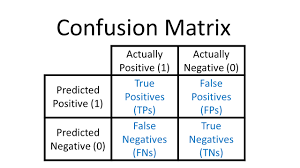

Accuracy ->The ratio of correctly predicted instances to the total instances. Accuracy = TP+TN/TP+FP+TN+FN

Precision -> Focuses on the Propotion of True Positives among all Predicted Positives Precision = TP/TP+FP

Recall -> Focuses on the Propotion of True Positives captured among all actual Positives Recall = TP/TP+FN

F1 Score = 2 * (Precision * Recall/Precision + Recall)

### ROC-AUC
• Definition: Measures the trade-off between true positive rate (TPR) and false positive
rate (FPR) at various thresholds.

In [60]:
from sklearn.metrics import roc_auc_score

# Probability Predictions
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.95


## Regression Metrics

### Mean Absolute Error (MAE)
• Measures the average magnitude of errors without considering their direction.

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Synthetic Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions on X_test data
y_pred = model.predict(X_test)

#calculating the Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
#Printing mae
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.08


### Mean Squared Error(MSE)
- MSE calculates the average of the squared errors between predicted and actual values.


### Root Mean Squared Error(RMSE)
- RMSE is the square root of the MSE, which brings the error back to the same unit as the target variable.

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np
# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 0.01
Root Mean Squared Error: 0.10


### R² Score (Coefficient of Determination)
- The R² score is a statistical measure used to evaluate the performance of a regression model. It indicates how well the model’s predictions match the actual data. Essentially, it tells you the proportion of the variance in the target variable that is explained by the model.

In [74]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"r2: {r2:.2f}")

r2: 1.00
